# Проект: Аналитика интернет магазина, A/В тестирование.

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Описание данных:
### Данные для первой части
#### *Файл /datasets/hypothesis.csv*

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### *Данные для второй части*

#### Файл /datasets/orders.csv

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

#### Файл /datasets/visitors.csv.

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Описание проекта

### *Часть 1. Приоритизация гипотез*

*В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort*
#### Задача
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

### *Часть 2. Анализ A/B-теста*
*Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv*
#### Задача
- Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

## Изучение и обзор данных

In [1]:
# Необходимые библиотеки для исследования 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np    
from scipy import stats as st
import seaborn as sns
from IPython.display import display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Загрузка необходимых данных

In [2]:
# Загрузка файлов
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('hypothesis.csv')
    
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('orders.csv')
    
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('visitors.csv')
    


Получение общей информации датасета hypothesis

In [3]:
pd.options.display.max_colwidth = 1
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
hypothesis.duplicated().sum()

0

При анализе датасета hypothesis выявлено: всего 9 строк, 5 столбцов, пропусков нет, дубликатов нет.


Названия колонок датасета hypothesis приведем к единому регистру

In [6]:
hypothesis.columns = hypothesis.columns.str.lower()

Изучение датасета orders.

In [7]:
# Получение общей информации датасета orders
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
# проверим количество дубликатов в датасете orders, кол-во дубликатов равно 0.
orders.duplicated().sum()

0

In [10]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
display(orders.describe(include='all'))

,transactionId,visitorId,date,revenue,group
count,1197.00,1197.00,1197,1197.00,1197
unique,NaN,NaN,31,NaN,2
top,NaN,NaN,2019-08-05,NaN,B
freq,NaN,NaN,48,NaN,640
mean,2155621385.53,2165960143.10,NaN,8348.01,NaN
std,1229084904.76,1236014192.15,NaN,39191.13,NaN
min,1062393.00,5114589.00,NaN,50.00,NaN
25%,1166775572.00,1111826046.00,NaN,1220.00,NaN
50%,2145193898.00,2217984702.00,NaN,2978.00,NaN
75%,3237740112.00,3177606451.00,NaN,8290.00,NaN


При анализе датасета orders выявлено: 
* всего 1197 строк, 5 столбцов, пропусков нет, дубликатов нет. 
* Максимальная выручка составляет - 1 294 500, что достаточно большая величина. А минимальная 50. Также видим что 75% значений лежит в диапазоне от 50 до 8290 у.е, а 25% квартиль имеет значение 1220 у.е,
можем предположить, что минимальное и максимальное значение является аномалиями, проверим это позднее.
* Столбец с датой необходимо перевести из объектного типа в тип datetime64.
* Видно, что мы имеем данные в период с 2019-08-01 по 2019-08-31.
* Также виден небольшой перекос в распределинее групп, 640 пользователей относятся к группе B, что больше чем 50%. Позже изучим распределине по группам.


In [11]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

Изучим датасет visitors.

In [12]:
# Получение общей информации датасета visitors
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
# проверим количество дубликатов в датасете visitors, кол-во дубликатов равно 0.
visitors.duplicated().sum()

0

In [15]:
display(visitors.describe(include='all'))

,date,group,visitors
count,62,62,62.00
unique,31,2,NaN
top,2019-08-11,B,NaN
freq,2,31,NaN
mean,NaN,NaN,607.29
std,NaN,NaN,114.40
min,NaN,NaN,361.00
25%,NaN,NaN,534.00
50%,NaN,NaN,624.50
75%,NaN,NaN,710.50


При анализе датасета visitors выявлено: 
* Всего 62 строк, 3 столбца
* Отметим, что данные полные, так как записей группы А и В ровно по 31 штуке, что соответсвует записям за каждый день месяца.
* Пропусков нет, дубликатов нет. 
* Максимальное количество пользователей за день - 770, а минимальное 361, что выглядит реалистично. 
* Столбец с датой необходимо перевести из объектного типа в тип datetime64.

In [16]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

### Выводы:

При анализе таблиц выявлено, что в датасетах hypothesis, orders, visitors отсутствуют пропуски в данных, дубликатов также нет. Данные готовы для дальнейшего использования.

## Часть 1. Приоритизация гипотез

#### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [17]:
pd.options.display.max_colwidth = 1
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False),0)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


0

#### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [18]:
pd.options.display.max_colwidth = 1
hypothesis ['RICE'] = hypothesis ['reach'] * hypothesis ['impact'] * hypothesis ['confidence'] / hypothesis ['efforts']
display(hypothesis [['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


#### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло

В случае применения фреймворка ICE для приоритизации гипотез, наиболее перспективные гипотезы 8,0,7 и 6. При применении фреймворка RICE наиболее перспективными становятся гипотезы 7,2,0 и 6. Гипотеза 7 стала на первом месте в фреймворке RICE в связи с тем, что ее параметр Reach максимальный и равен 10, у гипотезы 2 параметр Reach также велик и равен 8.

## Часть 2. Анализ A/B-теста

### Построим график кумулятивной выручки по группам

In [19]:
display(orders.groupby('visitorId')
    .agg({'group': pd.Series.nunique})
    .query('group == 2').count())

group    58
dtype: int64

Количество пользователей, входящих в обе группы сразу - 58 шт, от общего количества пользователей (1176) данное число составляет около 5%. Предлагаю пренебречь данными пользователями, большой погрешности в исследования они не должны привнести, кроме того, предполагаю, исходя из задания проекта и предложенных датасетов, исходные данные считаются "чистыми".

###### Сформируем кумулятивные данные

In [20]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
    orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
    visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


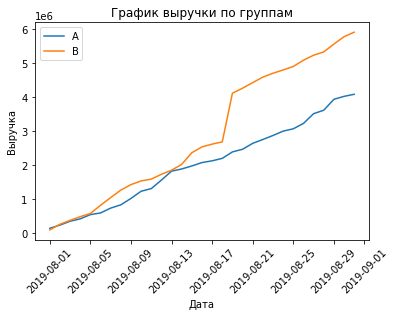

In [21]:
# строим график выручки по группам
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(rotation = 45)
plt.title('График выручки по группам')
plt.show()

#### Вывод:
- Выручка равномерно увеличивается в течение всего теста. Однако график выручки группы В в одной точке резко растет. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке*

### Построим графики среднего чека по группам

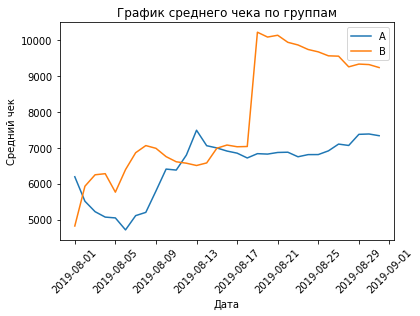

In [22]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.xticks(rotation = 45)
plt.title('График среднего чека по группам')
plt.show()

#### Вывод: 
- Средний чек тоже становится равномерным ближе к концу теста: установился для группы A и падает для группы B. Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Тогда группе В нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

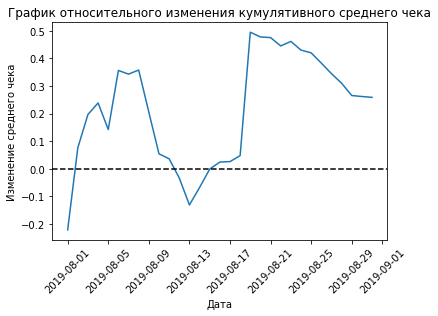

In [23]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.ylabel('Изменение среднего чека')
plt.xlabel('Дата')
plt.xticks(rotation = 45)
plt.title('График относительного изменения кумулятивного среднего чека')
plt.show()

#### Вывод: 
- В нескольких точках график различия между сегментами резко «скачет». Где-то спрятались крупные заказы или выбросы.

### Построим график кумулятивной конверсии по группам.

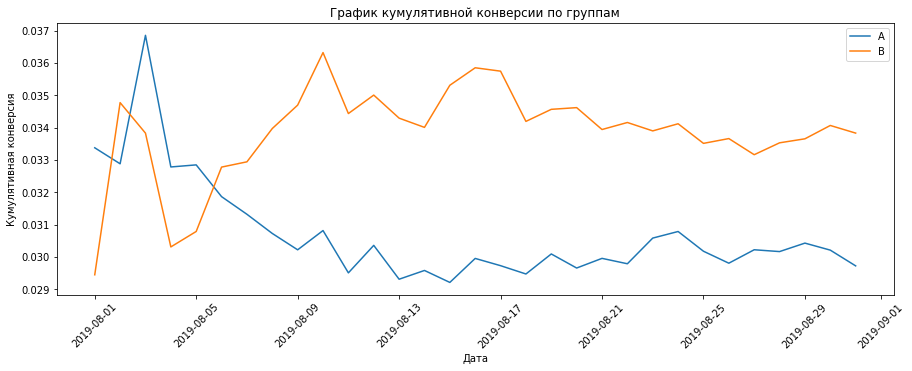

In [24]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
# строим графики
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.xticks(rotation = 45)
plt.title('График кумулятивной конверсии по группам')
plt.show()

#### Вывод: 
Изначально в первую неделю опыта в обеих группах происходит скачок конверсии, после чего группы значительно расходятся. В группе А просиходит снижение конверсии с 0.037 до уровня 0.030, вокруг которого значение и находится на протяжении опыта. А вот в группе B после скачка до 0.035 происходит резкое снижение значения конверсии до 0.030 с последующим постепенным ростом до 0.036 и относительно стабильным средним значением конверсии в размере 0.034-0.035.

В общем, сначала конверсии колебались, но довольно быстро выровнялись и результат группы В оказался стабильно лучше, чем в группе А

### Построим график относительного изменения кумулятивной конверсии группы B к группе A

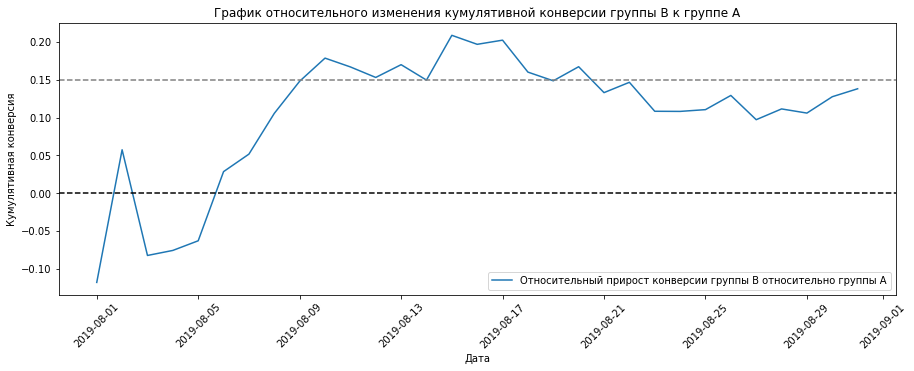

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.xticks(rotation = 45)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.show()

#### Вывод: 
Вскоре после начала теста конверсия группы В опередила конверсию А и до конца теста оставалась выше. На графике есть скачки, которые могут говорить о наличии выбросов в данных.

### Построим точечный график количества заказов по пользователям

       visitorId  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     


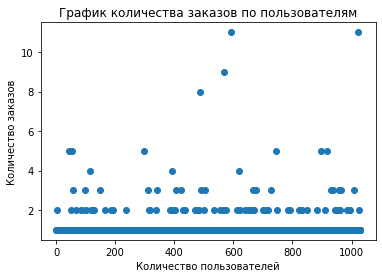

In [26]:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))
ordersByUsers.columns = ['visitorId', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.title('График количества заказов по пользователям')
plt.show()

#### Вывод:
- Пользователей, заказавших более 3 раз немного, они вполне могут быть аномальными. Принято отсеивать от 1% до 5% наблюдений с крайними значениями.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [27]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


#### Вывод: 
- Не более 5% пользователей заказали больше 2 раз и не более 1% пользователей больше 4 раз. Разумно выбрать 3 или 4 заказов на одного пользователя за нижнюю границу числа заказов и отсеять аномальных пользователей по ней.

### Построим точечный график стоимостей заказов.

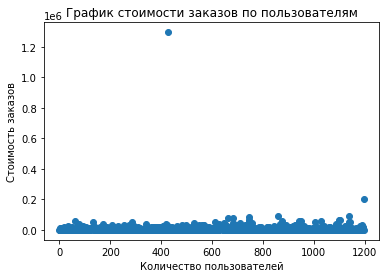

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество пользователей')
plt.title('График стоимости заказов по пользователям')
plt.show()

#### Вывод: 
- Eсть несколько дорогих заказов. Максимальная сумма заказа - 1 294 500, принято отсеивать от 1% до 5% наблюдений с крайними значениями. В данных явно есть заказы дороже 50 000, однако большинство имеет меньшую выручку.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных пользователей

In [29]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


###### Вывод:
- Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58233.2 рублей. Разумно выбрать цену стоимости заказа в 28 000 за нижнюю границу и отсеять аномальные величины по ней.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

###### Проверка гипотезы

*Сформулируем гипотезу.*
- Нулевая гипотеза : различий в конверсии между группами нет. 
- Альтернативная гипотеза: различия в конверсии между группами есть.

Подготовим данные

In [30]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1,)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1,)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}),axis=1,).sort_values(by=['date'])
ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA',]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),axis=1,).sort_values(by=['date'])
ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB',]
data = (ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))
display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


- Посчитаем статистическую значимость различия в конверсии между группами. 
- Метод, который будем применять для A/B-тестирования, называется критерий Манна-Уитни (st.mannwhitneyu).
- критический уровень статистической значимости p-value = 0,05
- если полученный результат будет меньше  < 0,05, то отвергаем нулевую гипотезу: разница статистически значима.

In [31]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
ordersByUsersA = (orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId', 'orders']

- В sampleA сохраним выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль, т.е число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B.
- Также выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1

In [32]:
sampleA = pd.concat([ordersByUsersA['orders'],
        pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
            name='orders',),],axis=0,)

sampleB = pd.concat([ordersByUsersB['orders'],
        pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
            name='orders',),],axis=0,)

print('Значение p-value, ',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Значение p-value,  0.017
0.138


###### Вывод: 
- По «сырым» данным различия в конверсии групп A и B есть. Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный проигрыш группы A равен 13.8% (второе число в выводе).

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

###### Проверим статистическую значимость различий в среднем чеке. 

*Сформулируем гипотезу*
- Нулевая гипотеза: различий в среднем чеке между группами нет. 
- Альтернативная гипотеза: различия в среднем чеке между группами есть. 

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.

In [33]:
print('Значение p-value, ', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Значение p-value,  0.729
0.259


###### Вывод:
- P-value = 0.729 значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B выше среднего чека группы A

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. Узнаем, сколько всего аномальных пользователей методом shape(). 

In [34]:
usersWithManyOrders = pd.concat([
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId'],],axis=0,)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates().sort_values())
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorId, dtype: int64
63


###### Вывод:
- Всего 63 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста. 
###### За *нулевую гипотезу* возьмём что: "статистически значимых различий в конверсии между группами нет"; тогда *альтернативная гипотеза* будет гласить - статистически значимые различия есть.

In [35]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
            name='orders',),],axis=0,)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
            name='orders',),],axis=0,)
# Применим статистический критерий Манна-Уитни к полученным выборкам
print('Значение p-value, ', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Значение p-value,  0.018
0.148


###### Вывод: 
- По «сырым» данным первое число — p-value = 0.017, по очищенным данным p-value = 0.018. 
- ###### Величина P-value меньше 0.05. Значит, принимаем альтернативную гипотезу, что дает основание отвергнуть предположение об отсутствии различий.
- Средний чек группы B выше среднего чека группы A
- По «сырым» данным относительный проигрыш группы A равен 13.8%, по очищенным данным - 14.8%.

*Результаты по конверсии практически не изменились*

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

###### За нулевую гипотезу возьмём что: "статистически значимых различий в конверсии между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [36]:
print('Значение p-value, ', '{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],
            orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]
                  ['revenue'],)[1]))
print("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]
                  ['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId']
                  .isin(abnormalUsers)),)]['revenue'].mean()- 1))

Значение p-value,  0.977
-0.017


###### Вывод:
- P-value = 0.977, что значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
- Средний чек группы B ниже среднего чека группы A (- 0,017).
- По сравнению с "сырыми" данными P-value незначительно изменился (был 0,729). *Нет статистически значимого различия по среднему чеку между группами*.
- Разница между сегментами изменилась существенно (была 0,259), а стала отрицательной. Это означает, что по "очищенным" данным средний чек группы B чуть ниже среднего чека группы A.

*Хотя общие выводы по результатам теста не изменились, пример показывает, как сильно аномалии могут влиять на результаты A/B-теста.*

### Примите решение по результатам теста и объясните его. Варианты решений: 
- 1. Остановить тест, зафиксировать победу одной из групп. 
- 2. Остановить тест, зафиксировать отсутствие различий между группами. 
- 3. Продолжить тест.

## Вывод: Какие выводы по тесту можно сделать?
- ###### Проделанная работа:


- *Приоритизация гипотез*
    - Для приоритизации гипотез были применены фреймворк ICE и RICE. В случае применения фреймворка ICE, наиболее перспективные гипотезы 8,0,7 и 6. При применении фреймворка RICE наиболее перспективными становятся гипотезы 7,2,0 и 6. Гипотеза 7 стала на первом месте в фреймворке RICE в связи с тем, что ее параметр Reach максимальный и равен 10, у гипотезы 2 параметр Reach также велик и равен 8.

- *Проанализирован A/B-тест:*
    - Построены графики кумулятивной выручки и кумулятивного среднего чека  по группам;
    - Построены графики относительного изменения кумулятивного среднего чека группы B к группе A, кумулятивной конверсии по группам, относительного изменения кумулятивной конверсии;
    - Построен точечный график количества заказов по пользователям и стоимостей заказов;
    - Посчитаны 95-й и 99-й перцентили количества заказов на пользователя и стоимости заказов;
    - Посчитаны статистические значимости различий в конверсии и среднем чеке заказа между группами по «сырым» данным;
    - Посчитаны статистические значимости различий в конверсии и среднем чеке заказа между группами по «очищеным» данным;
- ###### Выводы по исходным данным:

между конверсией в группах есть статистически важные различия, конверсия в групе B относительно группы A выше на 14%;
по среднему чеку различий нет, средний чек в групе B относительно группы A выше на 26% (тут заметно влияние единичного заказа на очень большую сумму).

- ###### Выводы по данным без выбросов:

между конверсией в группах есть статистически важные различия, конверсия в групе B относительно группы A выше на 15%;
по среднему чеку различий также не появилось, хотя средний чек в "чистой" групе B относительно группы A теперь наоборот, ниже на 1,7% (это логично, т.к.обычно количество покупок растёт при уменьшении цены).


- ###### Итоговый вывод

По анализу результатов A/B-теста принято решение остановить тест, зафиксировав победу тестовой группы. Группа B статистически лучше группы A по метрике конверсии, но различий в средних чеках нет.

По условиям задачи проверяется эффективность гипотезы в плане увеличения выручки и поскольку конверсия пользователей влияет на выручку и мы получили результат, что конверсия в тестовой группе значительно увеличилась, по сравнению с контрольной, даже с учётом того, что средний чек остался без изменений, нет никакого смысла и далее продолжать тест.
